# Property Valuation Toy Model

In [12]:
# standard imports

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette(sns.color_palette("Spectral"))
sns.set_style("darkgrid")

import datetime

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1000
mpl.rcParams["axes.labelsize"] = 15
pd.set_option('display.max_columns', 999)

### Read in NRP Assets Sheet

In [13]:
df = pd.read_csv("assets.csv")

# Get rid of properties with no address
df = df.dropna(axis = 0, subset = ['Address','Zip','City',"State"])

df["full_address"] = df["Address"] + ', ' + df["City"] + ', ' + df["State"] + ', ' + df["Zip"].apply(lambda x: str(int(x)))

num_props = df.shape[0]


### LIHTC Assets Analysis

In [14]:
# filter for lihtc properties
lihtc = df[df["Product Type"].isin(['4%','9%'])]

num_lihtc_props = lihtc.shape[0]

print("{0:.2f} of NRP Group properties are LIHTC".format(num_lihtc_props/num_props))

0.64 of NRP Group properties are LIHTC


<AxesSubplot:title={'center':'Top 10 Cities with NRP LIHTC Properties'}, ylabel='Number of Properties'>

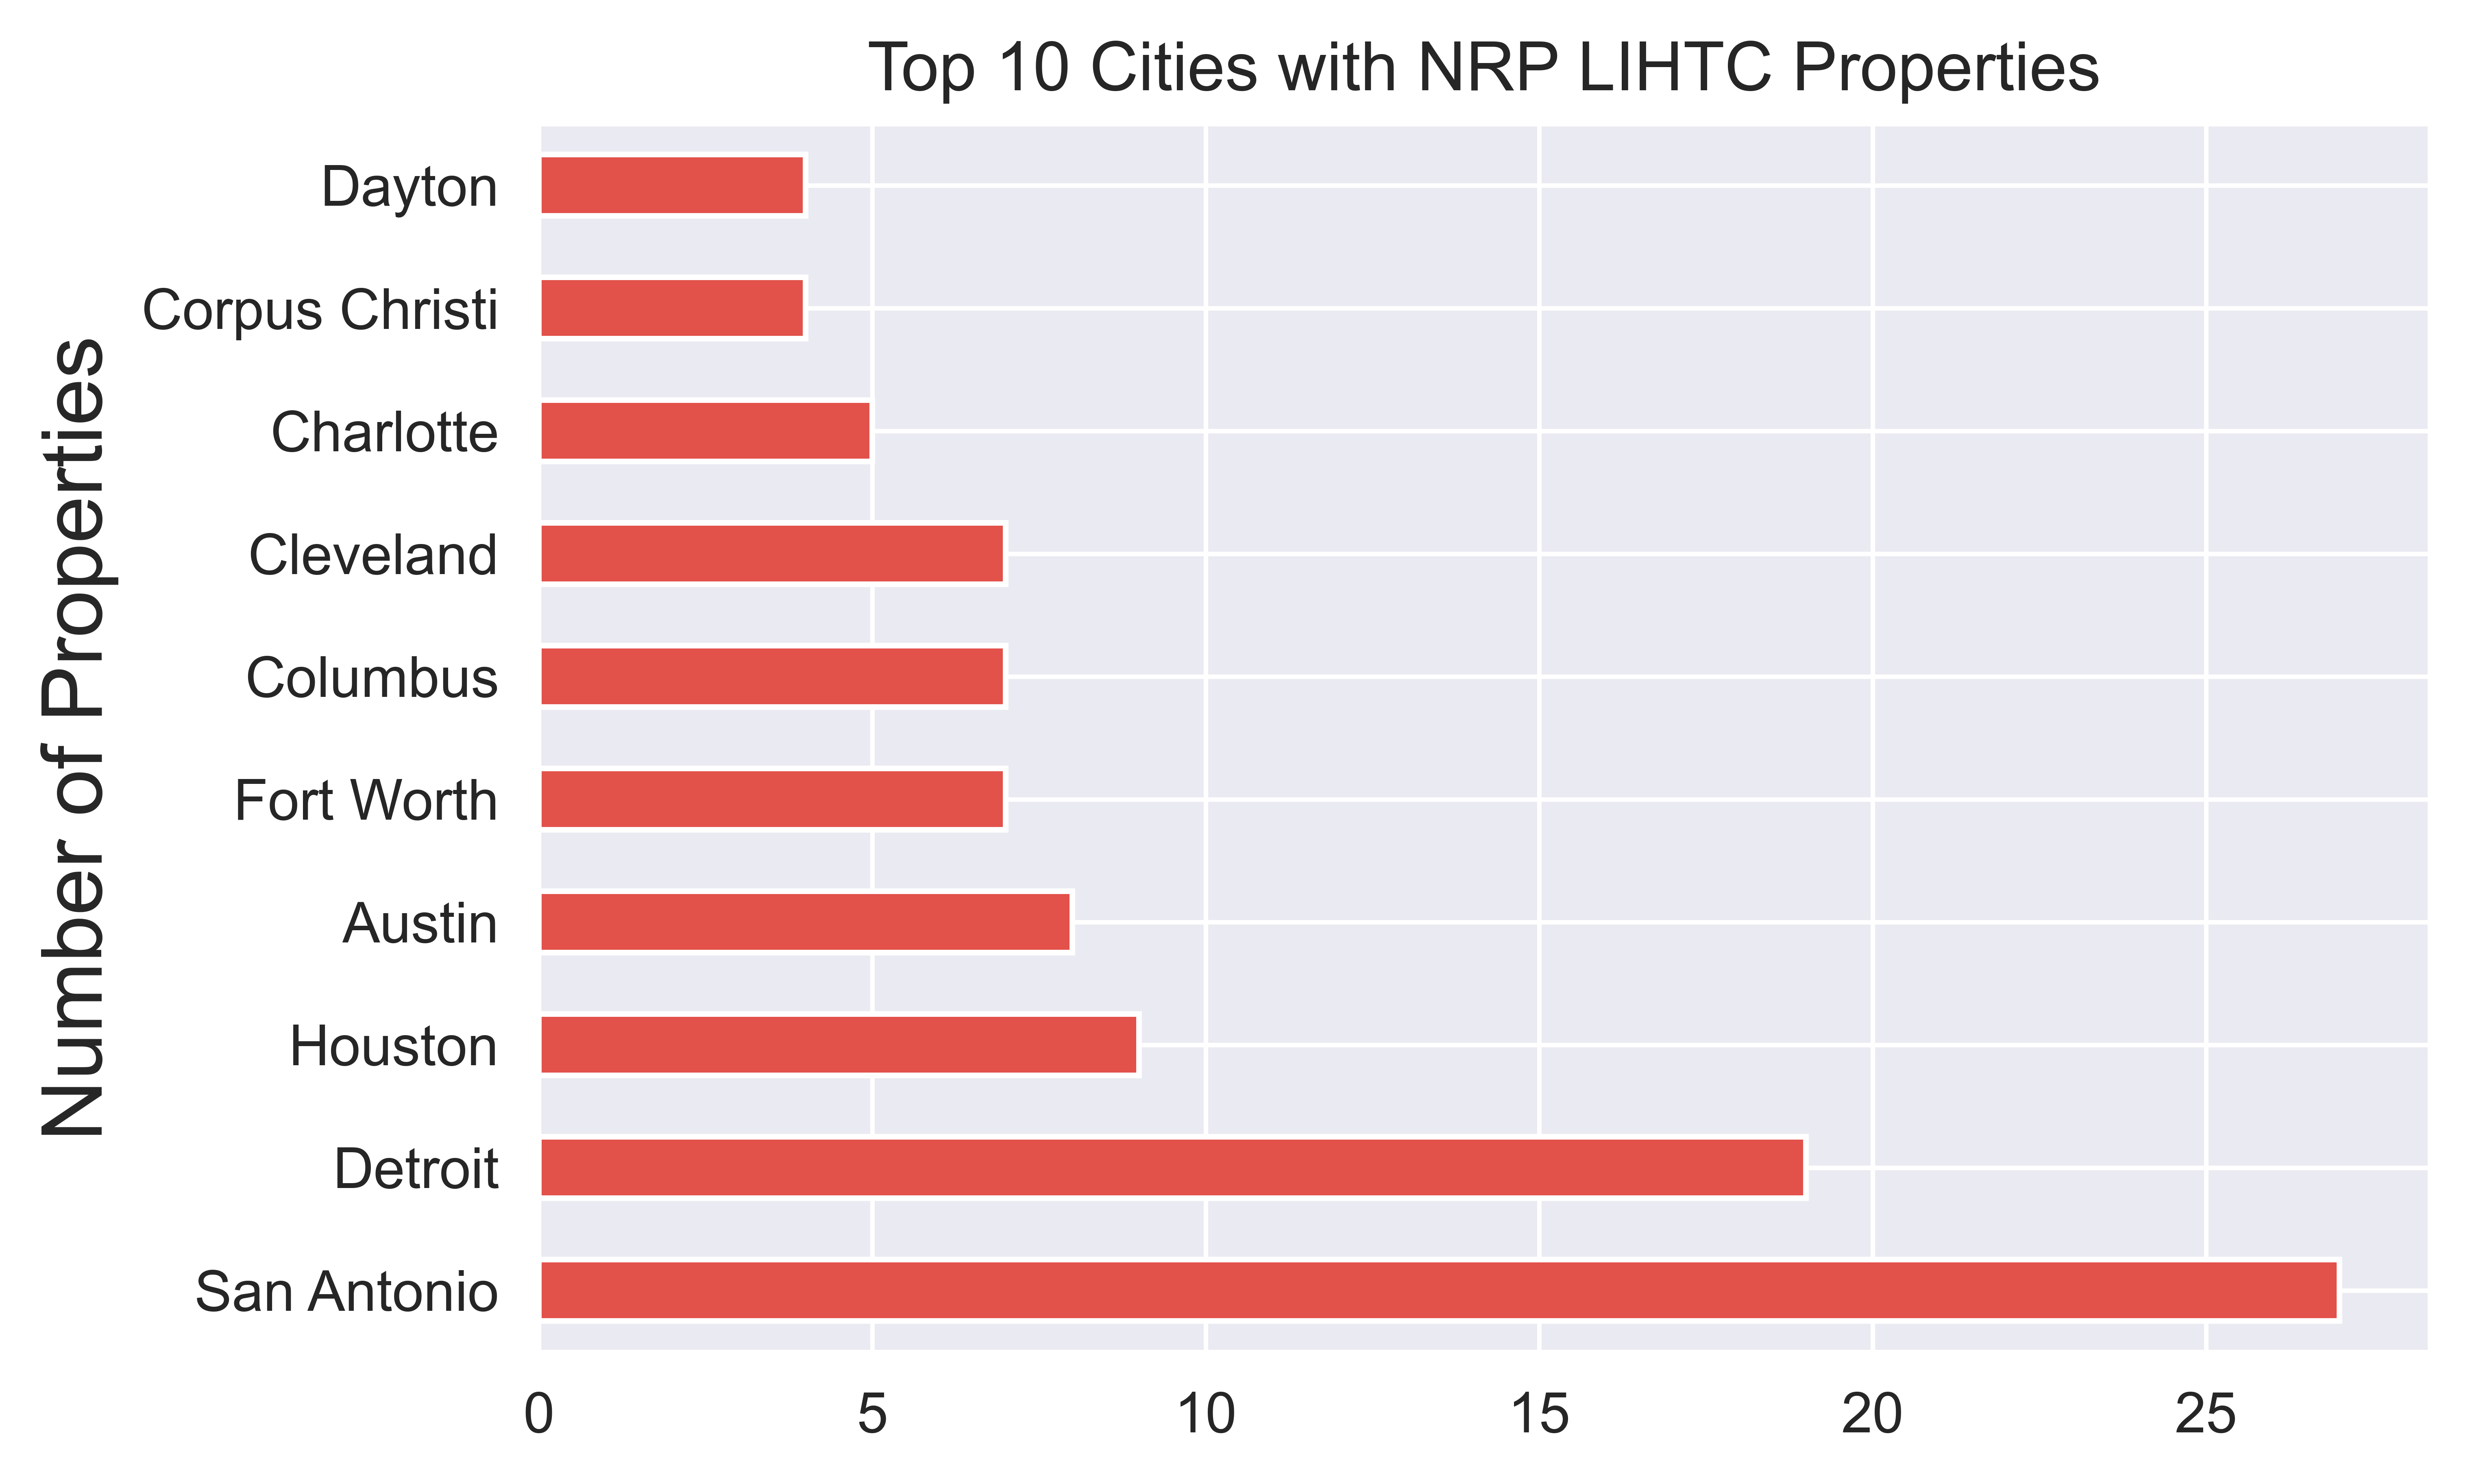

In [15]:
lihtc.groupby("City").size().sort_values(ascending=False).iloc[:10].plot.barh(fontsize = 10, xlabel = "Number of Properties", ylabel = "City", title = "Top 10 Cities with NRP LIHTC Properties")


In [16]:
lihtc["Construction End Date"] = pd.to_datetime(lihtc["Construction End Date"], format = "%m/%d/%Y")
lihtc["Closing Date"] = pd.to_datetime(lihtc["Closing Date"], format = "%m/%d/%Y")
lihtc.dropna(axis = 0, subset = ["Closing Date"], inplace = True)

<ipython-input-16-a01a48bd572a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lihtc["Construction End Date"] = pd.to_datetime(lihtc["Construction End Date"], format = "%m/%d/%Y")
<ipython-input-16-a01a48bd572a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lihtc["Closing Date"] = pd.to_datetime(lihtc["Closing Date"], format = "%m/%d/%Y")
<ipython-input-16-a01a48bd572a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [17]:
# assume 2 year construction window
lihtc["Construction End Date"].fillna(lihtc["Closing Date"] + datetime.timedelta(days = 365 * 2), inplace = True)

c:\Users\randymi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [42]:
# fort worth 2018 - 2022
fort_worth_range = lihtc[lihtc["Construction End Date"].dt.year.isin(range(2018,2022))]
fort_worth_valid = fort_worth_range[fort_worth_range["City"] == "Fort Worth"]
fort_worth_valid.to_excel("Fort Worth NRP LIHTC (2018-2022).xlsx")

In [41]:
#2016 - 2022
austin_range = lihtc[lihtc["Construction End Date"].dt.year.isin([2016,2017,2018,2019,2020,2021,2022])]
austin_valid = austin_range[austin_range["City"] == "Austin"]
austin_valid.to_excel("Austin NRP LIHTC (2016-2022).xlsx")

In [40]:
# 2012 - 2022 data
houston_range = lihtc[lihtc["Construction End Date"].dt.year.isin(range(2013,2021))]
houston_valid = houston_range[houston_range["City"] == "Houston"]
houston_valid.to_excel("Houston NRP LIHTC (2012-2022).xlsx")

In [39]:
# 2019 - 2022
san_antonio_range = lihtc[lihtc["Construction End Date"].dt.year.isin([2020,2021])]
san_antonio_valid = san_antonio_range[san_antonio_range["City"] == "San Antonio"]
san_antonio_valid.to_excel("San Antonio NRP LIHTC (2019-2022).xlsx")

#### Let's see where they are on a map

In [ ]:
# 5 properties
austin


,Lifecycle,Portal Name,Legal Name,Marketing Name,Units,Address,City,State,Zip,Phone,MSA,Email,Product Type,Rural / Urban,HUD,Lifestyle Type,Building Type,Owner,Origination Source,Development Date,Closing Date,Sold Date,Management Company,Construction - General Contractor,Intercompany Account,Project Id,Prevailing Wage,Prevailing Wage Notes,Construction Percent Complete,Construction End Date,Yardi Code,full_address
0,Construction,City Heights,"MHP City Heights, Ltd.",NaN,179.0,4400 Nuckols Crossing Rd,Austin,TX,78744.0,NaN,NaN,apadilla@mcdhousing.com,4%,NaN,No,Multi-Family,Podium,No,Third Party GC,4/14/2021,4/13/2021,NaN,Unassigned,On Track Ministries,NaN,1342,None,NaN,46.17%,5/14/2023,NaN,"4400 Nuckols Crossing Rd, Austin, TX, 78744"
1,Construction,El Prado at Estancia (Bridge at Estancia),El Prado at Estancia Ltd.,Bridge at Estancia,318.0,1100 Avenida Mercado Street,Austin,TX,78652.0,737-301-1303,NaN,Estancia@nrpgroup.com,4%,Suburban,No,Multi-Family,Elevator,No,Development,12/29/2020,12/6/2021,NaN,NRP Management LLC,Austin Afforable Housing Corporation,10-77-000-1162.66,1316,None,N/A; no soft funds,19.69%,1/2/2024,txestan,"1100 Avenida Mercado Street, Austin, TX, 78652"
2,Construction,Enclave on Ross,"Enclave on Ross, LP",NaN,288.0,4700 Ross Road,Austin,TX,78617.0,NaN,NaN,NaN,4%,NaN,Yes,Multi-Family,Elevator,No,Third Party GC,8/17/2021,8/27/2021,NaN,Unassigned,NRP Construction LLC,NaN,1337,NaN,NaN,57.96%,9/13/2023,NaN,"4700 Ross Road, Austin, TX, 78617"
3,Construction,Grand Ave Flats (The James on Grand Avenue),Grand Avenue Flats Ltd.,The James on Grand Avenue,275.0,15701 FM 1325 RD,Austin,TX,78728.0,737-270-8159,NaN,JamesGrandAve@nrpgroup.com,4%,Suburban,No,Multi-Family,Elevator,Yes,Development,5/29/2020,8/5/2021,NaN,NRP Management LLC,"NRP Contractors II LLC, Capital Area Multi-Hou...",10-77-000-1162.61,1137,NaN,NaN,35.93%,9/18/2023,txjames,"15701 FM 1325 RD, Austin, TX, 78728"
4,Construction,The Residences at Howard Lane (The Element),The Residences at Howard Lane Ltd.,The Element,300.0,5724 East Howard Lane,Austin,TX,78653.0,7372708054,NaN,TheElement@nrpgroup.com,4%,Suburban,No,Multi-Family,Garden,Yes,Development,6/11/2020,11/9/2021,NaN,NRP Management LLC,NaN,10-77-000-1162.62,1168,NaN,NaN,31.42%,1/1/2024,txelemen,"5724 East Howard Lane, Austin, TX, 78653"


In [ ]:
# get the lon and lat for each property

from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="nrp")

def get_lat(addr):
    try:
        return geolocator.geocode(addr).latitude
    except:
        return np.nan
    
def get_lon(addr):
    try:
        return geolocator.geocode(addr).longitude
    except:
        return np.nan

austin["lat"] = austin["full_address"].apply(get_lat)
austin["lon"] = austin["full_address"].apply(get_lon)


austin.to_csv("austin-geocoding.csv")

In [ ]:
# bruh wtf are these addresses. How are 2/5 of them invalid. Going to have to manually check these
# openaddress down right now so use Tableau


30.3808

![](NRP%20LIHTC%20Developments%20Austin.png)

### Get Nearby Addresses

In [ ]:
austin

,Lifecycle,Portal Name,Legal Name,Marketing Name,Units,Address,City,State,Zip,Phone,MSA,Email,Product Type,Rural / Urban,HUD,Lifestyle Type,Building Type,Owner,Origination Source,Development Date,Closing Date,Sold Date,Management Company,Construction - General Contractor,Intercompany Account,Project Id,Prevailing Wage,Prevailing Wage Notes,Construction Percent Complete,Construction End Date,Yardi Code,full_address,lat,lon
0,Construction,City Heights,"MHP City Heights, Ltd.",NaN,179.0,4400 Nuckols Crossing Rd,Austin,TX,78744.0,NaN,NaN,apadilla@mcdhousing.com,4%,NaN,No,Multi-Family,Podium,No,Third Party GC,4/14/2021,4/13/2021,NaN,Unassigned,On Track Ministries,NaN,1342,None,NaN,46.17%,5/14/2023,NaN,"4400 Nuckols Crossing Rd, Austin, TX, 78744",30.201754,-97.733670
1,Construction,El Prado at Estancia (Bridge at Estancia),El Prado at Estancia Ltd.,Bridge at Estancia,318.0,1100 Avenida Mercado Street,Austin,TX,78652.0,737-301-1303,NaN,Estancia@nrpgroup.com,4%,Suburban,No,Multi-Family,Elevator,No,Development,12/29/2020,12/6/2021,NaN,NRP Management LLC,Austin Afforable Housing Corporation,10-77-000-1162.66,1316,None,N/A; no soft funds,19.69%,1/2/2024,txestan,"1100 Avenida Mercado Street, Austin, TX, 78652",NaN,NaN
2,Construction,Enclave on Ross,"Enclave on Ross, LP",NaN,288.0,4700 Ross Road,Austin,TX,78617.0,NaN,NaN,NaN,4%,NaN,Yes,Multi-Family,Elevator,No,Third Party GC,8/17/2021,8/27/2021,NaN,Unassigned,NRP Construction LLC,NaN,1337,NaN,NaN,57.96%,9/13/2023,NaN,"4700 Ross Road, Austin, TX, 78617",30.171842,-97.621642
3,Construction,Grand Ave Flats (The James on Grand Avenue),Grand Avenue Flats Ltd.,The James on Grand Avenue,275.0,15701 FM 1325 RD,Austin,TX,78728.0,737-270-8159,NaN,JamesGrandAve@nrpgroup.com,4%,Suburban,No,Multi-Family,Elevator,Yes,Development,5/29/2020,8/5/2021,NaN,NRP Management LLC,"NRP Contractors II LLC, Capital Area Multi-Hou...",10-77-000-1162.61,1137,NaN,NaN,35.93%,9/18/2023,txjames,"15701 FM 1325 RD, Austin, TX, 78728",NaN,NaN
4,Construction,The Residences at Howard Lane (The Element),The Residences at Howard Lane Ltd.,The Element,300.0,5724 East Howard Lane,Austin,TX,78653.0,7372708054,NaN,TheElement@nrpgroup.com,4%,Suburban,No,Multi-Family,Garden,Yes,Development,6/11/2020,11/9/2021,NaN,NRP Management LLC,NaN,10-77-000-1162.62,1168,NaN,NaN,31.42%,1/1/2024,txelemen,"5724 East Howard Lane, Austin, TX, 78653",30.380800,-97.612683


: 